In [25]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# from manual_library.text_processing import tokenize_text,lemmatisasi_text
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
sns.set()

In [26]:
import pandas as pd
df = pd.read_csv('lemma.csv', delimiter=",")

# Display the DataFrame
display(df)

,full_text,text_clean,class,tokens,lemma
0,@sobat_anies 2. Keliru,keliru,1,['keliru'],keliru
1,@dccomm_gov Padat,padat,0,['padat'],padat
2,@islah_bahrawi @kangdede78 Pakar radikal radik...,pakar radikal radikul bawakata agama dukung ba...,1,"['pakar', 'radikal', 'radikul', 'bawakata', 'a...",pakar radikal radikul bawakata agama dukung ba...
3,@lengkongtweets @Avolanza Emg otak bengkok lu ...,memang otak bengkok kamu panas asal kamu tahu ...,1,"['memang', 'otak', 'bengkok', 'kamu', 'panas',...",memang otak bengkok kamu panas asal kamu tahu ...
4,Puji Anies Baswedan sebagai Pemimpin Masa Depa...,puji baswedan pimpin masa tokoh muhammadiyah o...,2,"['puji', 'baswedan', 'pimpin', 'masa', 'tokoh'...",puji baswedan pimpin masa tokoh muhammadiyah o...
...,...,...,...,...,...
418,"dalam memperkuat sistem ketahanan pangan, meng...",kuat sistem tahan pangan aman rantai pasok law...,2,"['kuat', 'sistem', 'tahan', 'pangan', 'aman', ...",kuat sistem tahan pangan aman rantai pasok law...
419,"Begitu pentingnya air bagi kehidupan ini, memb...",penting hidup buat benjamin franklin salah sat...,2,"['penting', 'hidup', 'buat', 'benjamin', 'fran...",penting hidup buat benjamin franklin salah sat...
420,"@kananboekankiri @sigitwid Pak prabowo, terima...",terima kasih atas ketidakberubahannya bohong b...,1,"['terima', 'kasih', 'atas', 'ketidakberubahann...",terima kasih atas ketidakberubahannya bohong b...
421,@BANGSAygSUJUD Sedari awal sy tidak percaya Pr...,dar awal percaya libat tragedi tuduh laku utam...,1,"['dar', 'awal', 'percaya', 'libat', 'tragedi',...",dar awal percaya libat tragedi tuduh laku utam...


In [27]:
x = df[['lemma']]
y = df['class']
print(x.shape)
print(y.shape)

(423, 1)
(423,)


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 1)
(127, 1)
(296,)
(127,)


In [29]:
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2

tfidf_train = tfidf.fit_transform(x_train['lemma'])

tfidf_test = tfidf.transform(x_test['lemma'])


X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())


X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,386,387,388,389,390,391,392,393,394,395
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.180075,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.61      0.28      0.39        39
           2       0.66      0.95      0.78        76

    accuracy                           0.65       127
   macro avg       0.42      0.41      0.39       127
weighted avg       0.58      0.65      0.58       127



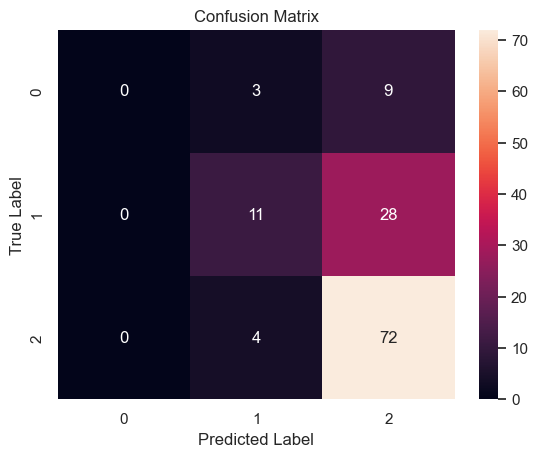

In [30]:
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = [0,1,2]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
import pickle
Pkl_Filename = "model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(classifier, file)